<a href="https://colab.research.google.com/github/573737/FALL-DETECTION/blob/main/savings_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the CSV file
file_path = 'SchemeData0107242055SS.csv'  # Update the file path if necessary
data = pd.read_csv(file_path)

# Define functions to categorize risk and age group
def categorize_risk(scheme_category):
    if "Liquid" in scheme_category or "Short Term" in scheme_category or "Ultra Short Term" in scheme_category or "Fixed Maturity" in scheme_category:
        return "Low-Risk"
    elif "Balanced" in scheme_category and "Conservative" in scheme_category or "Income" in scheme_category or "Gilt" in scheme_category:
        return "Medium-Risk"
    elif "Equity" in scheme_category or "Sectoral" in scheme_category or "Aggressive" in scheme_category:
        return "High-Risk"
    elif "Small Cap" in scheme_category or "Thematic" in scheme_category or "Emerging Market" in scheme_category:
        return "Very High-Risk"
    else:
        return "General"

def categorize_age_group(scheme_category):
    if "Equity" in scheme_category or "Sectoral" in scheme_category or "Aggressive" in scheme_category:
        return "Young Investors (20s-30s)"
    elif "Balanced" in scheme_category and "Conservative" in scheme_category or "Flexi-cap" in scheme_category or "Large Cap" in scheme_category:
        return "Middle-Aged Investors (40s-50s)"
    elif "Debt" in scheme_category or "Fixed Maturity" in scheme_category:
        return "Pre-Retirement"
    elif  "Senior Citizen" in scheme_category or "Large Cap" in scheme_category:
        return "Retirement"
    else:
        return "General"

# Apply categorization functions to the data
data['Risk Level'] = data['Scheme Category'].apply(categorize_risk)
data['Age Group'] = data['Scheme Category'].apply(categorize_age_group)

# Define a function to categorize investment duration
def categorize_duration(scheme_category):
    if ("Liquid" in scheme_category or
        "Ultra Short Term" in scheme_category or
        "Short Term" in scheme_category or
        "Fixed Maturity" in scheme_category):
        return "Short-Term"
    else:
        return "Long-Term"

# Apply the duration categorization function to the data
data['Investment Duration'] = data['Scheme Category'].apply(categorize_duration)
data['AMC']=data['AMC'].apply(lambda x: x.split()[0])

# Define a function to create tags
def create_tags(row):
    tags = []
    tags.append(row['AMC'].replace(" ", "").replace("Limited", "").replace("AMC", "").lower())
    tags.append(row['Scheme Type'].replace(" ", "").lower())
    tags.append(row['Scheme Category'].replace(" ", "").replace("&", "and").replace("-", "").lower())
    tags.append(row['Risk Level'].replace("-", "").replace(" ", "").lower())
    tags.append(row['Age Group'].replace(" ", "").replace("(", "").replace(")", "").replace("-", "").lower())
    tags.append(row['Investment Duration'].replace("-", "").replace(" ", "").lower())
    return list(tags)

# Apply the tags function to the data
data['Tags'] = data.apply(create_tags, axis=1)

# Save the updated data to a new CSV file
output_file_path = 'Updated_SchemeData.csv'
data.to_csv(output_file_path, index=False)

print("Updated data saved to:", output_file_path)


Updated data saved to: Updated_SchemeData.csv


In [ ]:
data=pd.read_csv("/content/Updated_SchemeData.csv")
data.head()

,AMC,Code,Scheme Name,Scheme Type,Scheme Category,Scheme NAV Name,Scheme Minimum Amount,Launch Date,Closure Date,ISIN Div Payout/ ISIN GrowthISIN Div Reinvestment,Risk Level,Age Group,Investment Duration,Tags
0,Aditya,100033,Aditya Birla Sun Life Equity Advantage Fund,Open Ended,Equity Scheme - Large & Mid Cap Fund,Aditya Birla Sun Life Equity Advantage Fund - ...,5000,24-Feb-1995,24-Feb-1995,INF209K01165,High-Risk,Young Investors (20s-30s),Long-Term,"['aditya', 'openended', 'equityschemelargeandm..."
1,Aditya,100034,Aditya Birla Sun Life Equity Advantage Fund,Open Ended,Equity Scheme - Large & Mid Cap Fund,Aditya Birla Sun Life Equity Advantage Fund -R...,5000,24-Feb-1995,24-Feb-1995,INF209K01157INF209K01CE5,High-Risk,Young Investors (20s-30s),Long-Term,"['aditya', 'openended', 'equityschemelargeandm..."
2,Aditya,119433,Aditya Birla Sun Life Equity Advantage Fund,Open Ended,Equity Scheme - Large & Mid Cap Fund,Aditya Birla Sun Life Equity Advantage Fund -D...,5000,24-Feb-1995,24-Feb-1995,INF209K01VG0INF209K01VI6,High-Risk,Young Investors (20s-30s),Long-Term,"['aditya', 'openended', 'equityschemelargeandm..."
3,Aditya,119436,Aditya Birla Sun Life Equity Advantage Fund,Open Ended,Equity Scheme - Large & Mid Cap Fund,Aditya Birla Sun Life Equity Advantage Fund - ...,5000,24-Feb-1995,24-Feb-1995,INF209K01VH8,High-Risk,Young Investors (20s-30s),Long-Term,"['aditya', 'openended', 'equityschemelargeandm..."
4,Aditya,100037,Aditya Birla Sun Life Income Fund,Open Ended,Debt Scheme - Medium to Long Duration Fund,Aditya Birla Sun Life Income Fund - Regular - ...,5000,01-Jan-1994,01-Jan-1994,INF209K01587INF209K01CY3,General,Pre-Retirement,Long-Term,"['aditya', 'openended', 'debtschememediumtolon..."


In [ ]:
data=data[["AMC",'Code','Scheme Category','Scheme Type','Risk Level','Age Group','Investment Duration','Tags']]

In [ ]:
output_file_path = 'final_MutualFunds_SchemeData.csv'
data.to_csv(output_file_path, index=False)

In [ ]:
data['Scheme Category'].value_counts()

Scheme Category
Income                                                            6644
Other Scheme - Index Funds                                         826
Equity Scheme - Sectoral/ Thematic                                 742
Debt Scheme - Liquid Fund                                          500
Growth                                                             371
Other Scheme - FoF Domestic                                        344
Debt Scheme - Overnight Fund                                       309
Debt Scheme - Ultra Short Duration Fund                            305
Debt Scheme - Short Duration Fund                                  296
Debt Scheme - Low Duration Fund                                    266
Debt Scheme - Corporate Bond Fund                                  242
Debt Scheme - Money Market Fund                                    234
Debt Scheme - Dynamic Bond                                         214
Debt Scheme - Banking and PSU Fund                           

In [ ]:
import re

In [ ]:
# def tag_2_idx(rows):
for i in range(len(data)):
  data_1=data['Tags'][i]
  data_1=data_1[2:-2]
  data_1=data_1.replace(" ","").replace("'","")
  data_1=data_1.split(',')
  data_2=data_1[2].split('scheme')
  for tags in data_2:
    data_1.append(tags)
  del data_1[2]
  data['Tags'][i]=data_1

In [ ]:
data.head(1)['Tags'].values

array([list(['aditya', 'openended', 'highrisk', 'younginvestors20s30s', 'longterm', 'equity', 'largeandmidcapfund'])],
      dtype=object)

In [ ]:
for tags in data_1:
  print(tags)

icici
openended
general
general
longterm
other
otheretfs


In [ ]:
data

,AMC,Code,Scheme Category,Scheme Type,Risk Level,Age Group,Investment Duration,Tags
0,Aditya,100033,Equity Scheme - Large & Mid Cap Fund,Open Ended,High-Risk,Young Investors (20s-30s),Long-Term,"['aditya', 'openended', 'equityschemelargeandm..."
1,Aditya,100034,Equity Scheme - Large & Mid Cap Fund,Open Ended,High-Risk,Young Investors (20s-30s),Long-Term,"['aditya', 'openended', 'equityschemelargeandm..."
2,Aditya,119433,Equity Scheme - Large & Mid Cap Fund,Open Ended,High-Risk,Young Investors (20s-30s),Long-Term,"['aditya', 'openended', 'equityschemelargeandm..."
3,Aditya,119436,Equity Scheme - Large & Mid Cap Fund,Open Ended,High-Risk,Young Investors (20s-30s),Long-Term,"['aditya', 'openended', 'equityschemelargeandm..."
4,Aditya,100037,Debt Scheme - Medium to Long Duration Fund,Open Ended,General,Pre-Retirement,Long-Term,"['aditya', 'openended', 'debtschememediumtolon..."
...,...,...,...,...,...,...,...,...
15409,Tata,152746,Other Scheme - Index Funds,Open Ended,General,General,Long-Term,"['tata', 'openended', 'otherschemeindexfunds',..."
15410,Tata,152747,Other Scheme - Index Funds,Open Ended,General,General,Long-Term,"['tata', 'openended', 'otherschemeindexfunds',..."
15411,Tata,152742,Other Scheme - Index Funds,Open Ended,General,General,Long-Term,"['tata', 'openended', 'otherschemeindexfunds',..."
15412,Tata,152743,Other Scheme - Index Funds,Open Ended,General,General,Long-Term,"['tata', 'openended', 'otherschemeindexfunds',..."


In [ ]:
data['Tags'].value_counts()

Tags
[icici, closeended, mediumrisk, general, longterm, income]            2255
[nippon, closeended, mediumrisk, general, longterm, income]           1415
[uti, closeended, mediumrisk, general, longterm, income]               837
[kotak, closeended, mediumrisk, general, longterm, income]             703
[sbi, closeended, mediumrisk, general, longterm, income]               436
                                                                      ... 
[quant, openended, general, general, longterm, moneymarket]              1
[jm, closeended, mediumrisk, general, longterm, income]                  1
[baroda, openended, general, general, longterm, growth]                  1
[uti, openended, general, general, longterm, other, goldetf]             1
[shriram, openended, general, general, longterm, other, otheretfs]       1
Name: count, Length: 1004, dtype: int64

In [ ]:
data["AMC"].unique()

array(['Aditya', 'DSP', 'HDFC', 'quant', 'JM', 'Kotak', 'LIC', 'ICICI',
       'Nippon', 'Taurus', 'Franklin', 'Canara', 'Sundaram', 'SBI', 'UTI',
       'Sahara', 'Tata', 'Baroda', 'HSBC', 'Quantum', 'Invesco', 'Mirae',
       'Bandhan', 'Bank', 'Edelweiss', 'Axis', 'Navi', 'Motilal', 'PGIM',
       'Union', 'Groww', 'PPFAS', '360', 'Shriram', 'IIFCL', 'IL&FS',
       'Mahindra', 'WhiteOak', 'ITI', 'Trust', 'NJ', 'Samco', 'Bajaj',
       'Helios', 'Zerodha', 'Old'], dtype=object)

In [ ]:
import pandas as pd
import random
import numpy as np

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Number of users
num_users = 25

# Generate user profiles
user_profiles = pd.DataFrame({
    'user_id': range(num_users),
    'age': [random.randint(20, 60) for _ in range(num_users)],
    'investment_amount': [random.randint(1000, 50000) for _ in range(num_users)],
    'risk_tolerance': [random.choice(['low', 'medium', 'high']) for _ in range(num_users)],
    'investment_horizon': [random.randint(1, 20) for _ in range(num_users)]
})

# Function to introduce missing values
def introduce_missing_values(df, missing_percentage):
    df = df.copy()
    for col in df.columns:
        if col != 'user_id':  # Avoid introducing missing values in user_id
            mask = np.random.rand(len(df)) < missing_percentage
            df.loc[mask, col] = np.nan
    return df

# Introduce 60% missing values
user_profiles = introduce_missing_values(user_profiles, 0.6)

print(user_profiles)
#

   user_id   age  investment_amount risk_tolerance  investment_horizon
0        0   NaN                NaN           high                 9.0
1        1  27.0            28651.0            NaN                 NaN
2        2  21.0             3082.0            NaN                 NaN
3        3   NaN                NaN            NaN                14.0
4        4   NaN                NaN            NaN                11.0
5        5   NaN                NaN           high                 9.0
6        6   NaN                NaN            NaN                 NaN
7        7  26.0                NaN            NaN                 NaN
8        8  54.0                NaN            NaN                11.0
9        9  25.0                NaN            NaN                 NaN


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, concatenate
import numpy as np

# Load the data
file_path = '/content/final_MutualFunds_SchemeData.csv'
data = pd.read_csv(file_path)

# Clean column names (if needed)
data.columns = data.columns.str.strip()

# Handle non-numeric values in relevant columns
# Example: 'Investment Duration' as integer, 'Risk Level' as categorical
data['Investment Duration'] = pd.to_numeric(data['Investment Duration'], errors='coerce').fillna(0).astype(int)
data['Risk Level'] = data['Risk Level'].astype('category').cat.codes

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse=False)
encoded_scheme_category = encoder.fit_transform(data[['Scheme Category']])

# Generate unique fund IDs
data['fund_id'] = data.index


# Combine user profiles with fund data (simplified example)
user_data = user_profiles.assign(dummy_key=1)
fund_data = data.assign(dummy_key=1)
combined_data = pd.merge(user_data, fund_data, on='dummy_key').drop('dummy_key', axis=1)

# Encode 'Tags' with LabelEncoder for multi-class classification
label_encoder = LabelEncoder()
combined_data['label'] = label_encoder.fit_transform(combined_data['Tags'])

# Split the data into training and validation sets
train_data, val_data = train_test_split(combined_data, test_size=0.2, random_state=42)

# Prepare the input data
train_user_ids = train_data['user_id'].values
train_fund_ids = train_data['fund_id'].values
train_labels = train_data['label'].values

val_user_ids = val_data['user_id'].values
val_fund_ids = val_data['fund_id'].values
val_labels = val_data['label'].values

# Define the model architecture
input_user_id = Input(shape=(1,))
input_fund_id = Input(shape=(1,))

# Embedding layers for users and funds
user_embedding = Embedding(input_dim=user_profiles['user_id'].nunique(), output_dim=10)(input_user_id)
fund_embedding = Embedding(input_dim=data['fund_id'].nunique(), output_dim=10)(input_fund_id)

# Flatten and concatenate the embeddings
user_flat = Flatten()(user_embedding)
fund_flat = Flatten()(fund_embedding)
merged = concatenate([user_flat, fund_flat])

# Add dense layers
dense1 = Dense(64, activation='relu')(merged)
dense2 = Dense(32, activation='relu')(dense1)
output = Dense(len(label_encoder.classes_), activation='softmax')(dense2)  # Multi-class output

# Compile the model
model = Model(inputs=[input_user_id, input_fund_id], outputs=output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit([train_user_ids, train_fund_ids], train_labels,
          validation_data=([val_user_ids, val_fund_ids], val_labels),
          epochs=10, batch_size=64)
Z

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
1927/1927 [==============================] - 20s 9ms/step - loss: 4.5918 - accuracy: 0.1681 - val_loss: 3.9710 - val_accuracy: 0.2399
Epoch 2/10
1927/1927 [==============================] - 18s 9ms/step - loss: 3.6424 - accuracy: 0.2944 - val_loss: 3.4512 - val_accuracy: 0.3162
Epoch 3/10
1927/1927 [==============================] - 17s 9ms/step - loss: 3.2663 - accuracy: 0.3412 - val_loss: 3.1628 - val_accuracy: 0.3550
Epoch 4/10
1927/1927 [==============================] - 19s 10ms/step - loss: 3.0084 - accuracy: 0.3690 - val_loss: 2.8734 - val_accuracy: 0.3838
Epoch 5/10
1927/1927 [==============================] - 17s 9ms/step - loss: 2.4766 - accuracy: 0.4297 - val_loss: 2.0709 - val_accuracy: 0.4849
Epoch 6/10
1927/1927 [==============================] - 16s 8ms/step - loss: 1.5769 - accuracy: 0.5903 - val_loss: 1.1856 - val_accuracy: 0.6785
Epoch 7/10
1927/1927 [==============================] - 17s 9ms/step - loss: 0.9022 - accuracy: 0.7483 - val_loss: 0.6529 - val_a

In [ ]:
data.columns

Index(['AMC', 'Code', 'Scheme Category', 'Scheme Type', 'Risk Level',
       'Age Group', 'Investment Duration', 'Tags'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model

# Assuming 'sample_data' is your sample dataset in a DataFrame format
sample_data = pd.DataFrame({
    'AMC': ['Aditya', 'Aditya', 'Aditya', 'Aditya', 'Aditya'],
    'Code': [100033, 100034, 119433, 119436, 100037],
    'Scheme Category': ['Equity Scheme - Large & Mid Cap Fund'] * 4 + ['Debt Scheme - Medium to Long Duration Fund'],
    'Scheme Type': ['Open Ended'] * 5,
    'Risk Level': ['High-Risk'] * 4 + ['General'],
    'Age Group': ['Young Investors (20s-30s)'] * 5,
    'Investment Duration': ['Long-Term'] * 5,
    'Tags': [['aditya', 'openended', 'equityschemelargeandmidcapfund'],
             ['aditya', 'openended', 'equityschemelargeandmidcapfund'],
             ['aditya', 'openended', 'equityschemelargeandmidcapfund'],
             ['aditya', 'openended', 'equityschemelargeandmidcapfund'],
             ['aditya', 'openended', 'debtschememediumtolongdurationfund']]
})

# Encode categorical variables in sample_data (similar to training data preprocessing)
# Example: One-hot encoding for 'Scheme Category'
encoder = OneHotEncoder(sparse=False)
encoded_scheme_category = encoder.fit_transform(sample_data[['Scheme Category']])

# Generate unique fund IDs (assuming you have a mapping for this)
sample_data['fund_id'] = np.arange(len(sample_data))  # Placeholder for fund_id

# Prepare input for prediction
sample_user_ids = np.zeros(len(sample_data))  # Assuming same user_id for all samples

# Make predictions
predictions = model.predict([sample_user_ids, sample_data['fund_id'].values])

# Assuming predictions are probabilities, you can get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Decode predicted labels if needed (using label_encoder.classes_)
# label_encoder.classes_[predicted_labels]

# Display predictions
sample_data['predicted_label'] = label_encoder.classes_[predicted_labels]
print(sample_data[[ 'predicted_label']])


1/1 [==============================] - 0s 40ms/step
                                     predicted_label
0  ['aditya', 'openended', 'equityschemelargeandm...
1  ['whiteoak', 'openended', 'equityschememultica...
2  ['aditya', 'openended', 'equityschemelargeandm...
3  ['aditya', 'openended', 'equityschemelargeandm...
4  ['aditya', 'openended', 'debtschememediumtolon...


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
import pickle

# Assuming 'model' is your trained Keras model
with open('recommendation_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)


In [ ]:
!pip install umap-learn

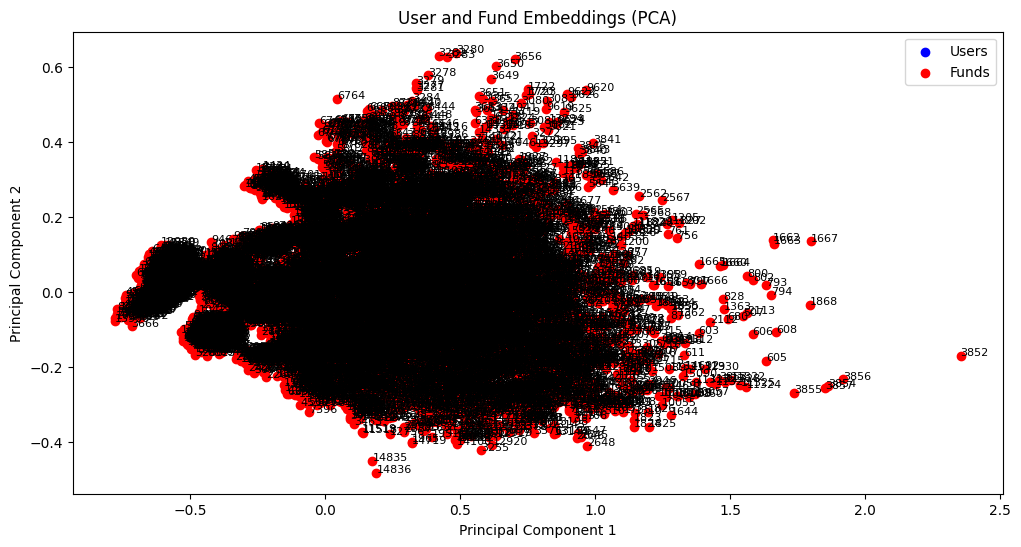

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Extract the weights from the embedding layers
user_embedding_weights = model.get_layer('embedding_12').get_weights()[0]
fund_embedding_weights = model.get_layer('embedding_13').get_weights()[0]

# Use PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
user_embedding_2d = pca.fit_transform(user_embedding_weights)
fund_embedding_2d = pca.fit_transform(fund_embedding_weights)

plt.figure(figsize=(12, 6))

# Plot user embeddings
plt.scatter(user_embedding_2d[:, 0], user_embedding_2d[:, 1], c='blue', label='Users')
for i in range(user_embedding_2d.shape[0]):
    plt.annotate(str(i), (user_embedding_2d[i, 0], user_embedding_2d[i, 1]), fontsize=8)

# Plot fund embeddings
plt.scatter(fund_embedding_2d[:, 0], fund_embedding_2d[:, 1], c='red', label='Funds')
for i in range(fund_embedding_2d.shape[0]):
    plt.annotate(str(i), (fund_embedding_2d[i, 0], fund_embedding_2d[i, 1]), fontsize=8)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('User and Fund Embeddings (PCA)')
plt.legend()
plt.show()


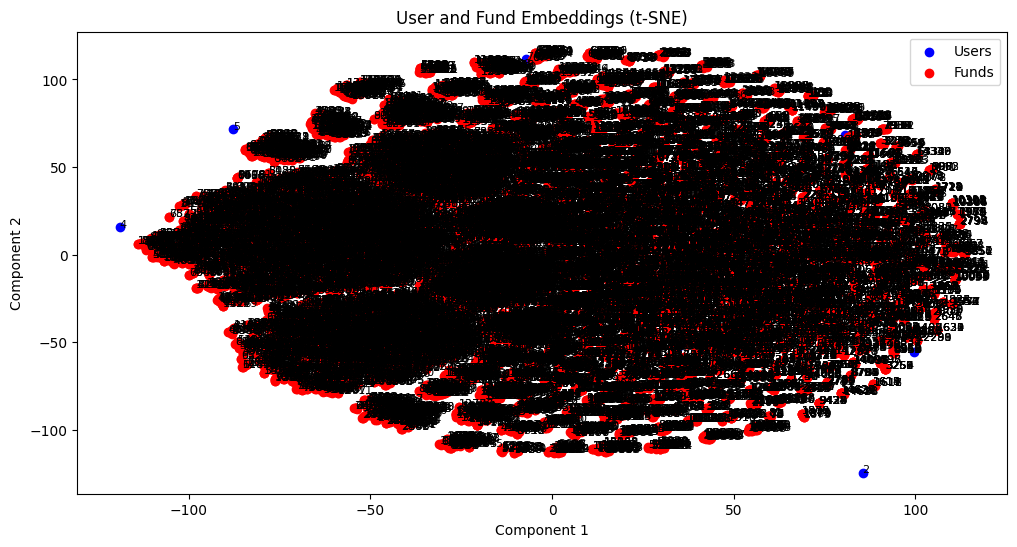

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Extract the weights from the embedding layers
user_embedding_weights = model.get_layer('embedding_12').get_weights()[0]
fund_embedding_weights = model.get_layer('embedding_13').get_weights()[0]

# Use t-SNE to reduce dimensions to 2 for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
user_embedding_2d = tsne.fit_transform(user_embedding_weights)
fund_embedding_2d = tsne.fit_transform(fund_embedding_weights)

plt.figure(figsize=(12, 6))

# Plot user embeddings
plt.scatter(user_embedding_2d[:, 0], user_embedding_2d[:, 1], c='blue', label='Users')
for i in range(user_embedding_2d.shape[0]):
    plt.annotate(str(i), (user_embedding_2d[i, 0], user_embedding_2d[i, 1]), fontsize=8)

# Plot fund embeddings
plt.scatter(fund_embedding_2d[:, 0], fund_embedding_2d[:, 1], c='red', label='Funds')
for i in range(fund_embedding_2d.shape[0]):
    plt.annotate(str(i), (fund_embedding_2d[i, 0], fund_embedding_2d[i, 1]), fontsize=8)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('User and Fund Embeddings (t-SNE)')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model  # If you haven't already loaded your model

# Assuming you have loaded and processed user_profiles and data similarly to your training process
# Example input data for prediction
user_ids_to_predict = np.array([1, 2, 3, 4, 5])  # Replace with actual user IDs to predict
fund_ids_to_predict = np.array([1, 12, 103, 14, 105])  # Replace with actual fund IDs to predict

# Load your trained model if it's not already loaded
# model = load_model('path_to_your_trained_model.h5')  # Replace with your model path

# Prepare the input data in the same format as during training
input_data = [user_ids_to_predict, fund_ids_to_predict]

# Make predictions
predictions = model.predict(input_data)

# Assuming predictions is an array of probabilities for each class
# Decode predictions to get the actual tag labels
predicted_labels = np.argmax(predictions, axis=1)  # Get the index of the highest probability

# Assuming label_encoder is your LabelEncoder used during training
predicted_tags = label_encoder.inverse_transform(predicted_labels)

# Print or use predicted_tags as needed
print("Predicted Tags:")
for user_id, fund_id, predicted_tag in zip(user_ids_to_predict, fund_ids_to_predict, predicted_tags):
    print(f"User ID: {user_id}, Fund ID: {fund_id}, Predicted Tag: {predicted_tag}")



1/1 [==============================] - 0s 34ms/step
Predicted Tags:
User ID: 1, Fund ID: 1, Predicted Tag: ['aditya', 'openended', 'equityschemelargeandmidcapfund', 'highrisk', 'younginvestors20s30s', 'longterm']
User ID: 2, Fund ID: 12, Predicted Tag: ['aditya', 'openended', 'debtschememediumtolongdurationfund', 'general', 'preretirement', 'longterm']
User ID: 3, Fund ID: 103, Predicted Tag: ['jm', 'openended', 'equityschemelargecapfund', 'highrisk', 'younginvestors20s30s', 'longterm']
User ID: 4, Fund ID: 14, Predicted Tag: ['aditya', 'openended', 'debtschemeliquidfund', 'lowrisk', 'preretirement', 'shortterm']
User ID: 5, Fund ID: 105, Predicted Tag: ['jm', 'openended', 'hybridschemeaggressivehybridfund', 'highrisk', 'younginvestors20s30s', 'longterm']
